# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [10]:
def demand(p):
    return 500 - 3.2*p

def supply(p,t):
    return -100 + 4.3*(p-t)

#Definering av funksjoner

In [11]:
x,t,p=sp.symbols('x,t,p', real=True, positive=True)
equ=sp.Eq(demand(p),supply(p,t))
equ

#Likevekts betingelse

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [4]:
eq_p=sp.solve(equ,p)
eq_p
#Pris likevekt, funksjon

[0.573333333333333*t + 80.0]

In [13]:
eq_t=supply(eq_p[0],t)
eq_t
#Kvantum likevekt, funksjon

244.0 - 1.83466666666667*t

In [22]:
eq_t_fn=sp.lambdify(
    (t),
    eq_t
)

eq_t_fn(t)

244.0 - 1.83466666666667*t

In [23]:
eq_p_fn=sp.lambdify(
    (t), 
    eq_p[0]
)

eq_p_fn(t)

0.573333333333333*t + 80.0

In [24]:
eq_t_fn(0)

#Likevekts kvantum uten avgift

244.0

In [26]:
eq_t_fn(4)

#Likevekts kvantum med avgift

236.66133333333332

In [28]:
eq_p_fn(0)

#Likevekts pris uten avgift

80.0

In [30]:
eq_p_fn(4)

#Likevekts pris med avgift

82.29333333333334

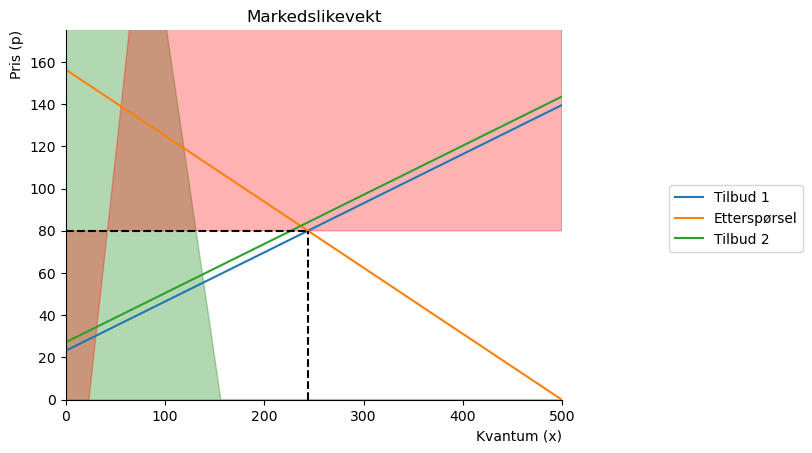

In [79]:
x_num=np.linspace(0.1,500,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,175))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(supply(x_num, 0),x_num, label='Tilbud 1')
ax.plot(demand(x_num),x_num, label='Etterspørsel')
ax.plot(supply(x_num, 4),x_num, label='Tilbud 2')

# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

ax.hlines(eq_p_fn(0),0,eq_t_fn(0), color='black',ls='dashed', label='p_eq')
ax.vlines(eq_t_fn(0),0,eq_p_fn(0), color='black',ls='dashed', label='t_eq')

ax.fill_between(x_num,demand(x_num),0, color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(x_num,supply(x_num,0),80, color = "red",alpha = 0.3,label='Produsentoverskudd')


#Ble mye tull her, men med at jupyter låste meg ute fikk jeg ikke jobbet så mye på den som jeg ville.

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||